In [28]:
from algames import ALGAMES

import numpy as np
import matplotlib.pyplot as plt

In [29]:
# M players
M = 2

# N horizon length
N = 10

# n state size
n = 4  # (x, y, v_x, v_y)

# m control input size
m = 2  # (a_x, a_y)

# timestep
dt = 0.1

# collision avoidance radius
r = 0.25

# running cost matrix
Q = np.eye(n)

# terminal cost matrix
Qf = np.eye(n) * 100

# control cost matrix
R = np.eye(m)

# penalty gain
rho = 0

# penalty schedule
gamma = 1.1

# convergance tolerance
eps = 10

# max iterations
max_iter = 10

# multiplier to enforce dynamics
dynamics_mult = 1000

In [ ]:
# initial state
x1_0 = np.array([0, 0, 2, 0])
x2_0 = np.array([0, -0.5, 3, 0])
list_x0 = [x1_0, x2_0]

# final state
x1_f = np.array([1, 0, 2, 0])
x2_f = np.array([2, 0, 2, 0])
list_xf = [x1_f, x2_f]

# constraints
constraint_wall_y = 1
constraint_u_x_max = 10
constraint_u_y_max = constraint_u_x_max

In [31]:
X, U = ALGAMES(
    M,  # number players
    N,  # horizon
    dt,  # timestep
    r,  # collision avoidance radius
    list_x0,  # list of initial states
    list_xf,  # list of target states
    Q,  # running cost matrix
    Qf,  # terminal cost matrix
    R,  # control cost matrix
    rho,  # constraint penalty value
    gamma,  # constraint penalty schedule
    eps,  # convergence tolerance
    constraint_wall_y,  # y value of horizontal wall
    constraint_u_x_max,  # control input x bound
    constraint_u_y_max,  # control input y bound
    max_iter,
    dynamics_mult,
)

512829.60505074845
512829.60505074845


Text(0.5, 0.98, 'velocity')

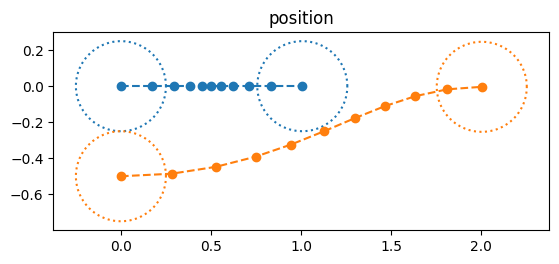

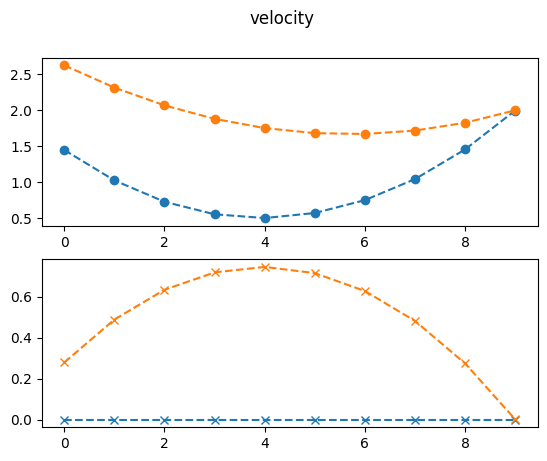

In [32]:
x_players = np.split(X, M)

# safety radius
th = np.linspace(0, 2 * np.pi, 180)
c_cos = np.cos(th) * r
c_sin = np.sin(th) * r

# plot
plt.figure()
for i, x in enumerate(x_players):
    x = np.reshape(x, (n, N), order="F")
    x0 = np.reshape(list_x0[i], (n, 1))
    x = np.hstack((x0, x))
    plt.plot(x[0, :], x[1, :], "o--")

    # plot cola radius
    plt.plot(x[0, 0] + c_cos, x[1, 0] + c_sin, ":", c=f"C{i}")
    plt.plot(x[0, -1] + c_cos, x[1, -1] + c_sin, ":", c=f"C{i}")
plt.gca().set_aspect("equal")
plt.title("position")

plt.figure()
for i, x in enumerate(x_players):
    x = np.reshape(x, (n, N), order="F")
    ax = plt.subplot(211)
    ax.plot(x[2, :], "o--", c=f"C{i}")
    ax = plt.subplot(212)
    ax.plot(x[3, :], "x--", c=f"C{i}")
plt.suptitle("velocity")

Text(0.5, 1.0, 'control')

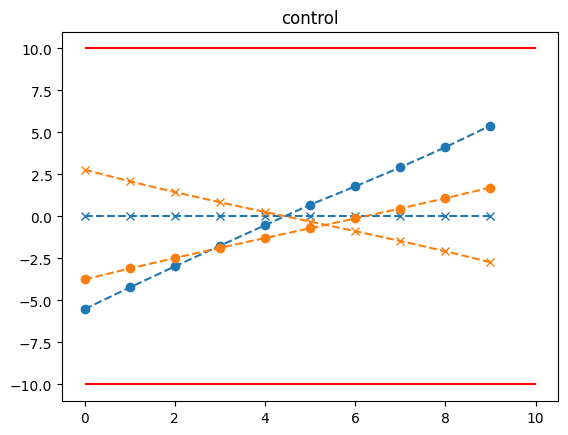

In [ ]:
u_players = np.split(U, M)

# plot
plt.figure()
for i, u in enumerate(u_players):
    u = np.reshape(u, (m, N), order="F")
    plt.plot(u[0, :], "o--", c=f"C{i}")
    plt.plot(u[1, :], "x--", c=f"C{i}")
plt.hlines((constraint_u_x_max, -constraint_u_x_max), 0, N, "r")
plt.title("control input");

Text(0.5, 1.0, 'initial guess')

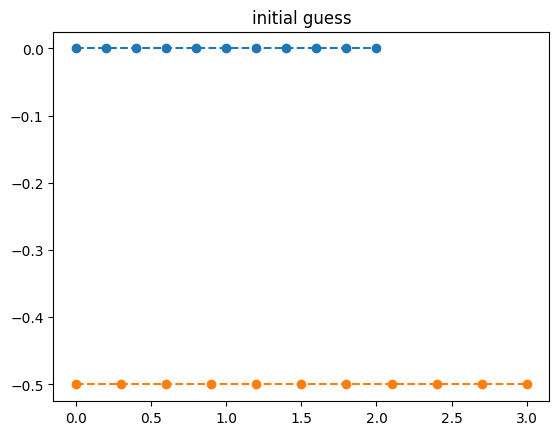

In [34]:
import initial_guess

y0, X_guess, U_guess, mu_guess = initial_guess.generate(list_x0, M, N, n, m, dt)
x_players = np.split(X_guess, M)
plt.figure()
for i, x in enumerate(x_players):
    x = np.reshape(x, (n, N), order="F")
    x0 = np.reshape(list_x0[i], (n, 1))
    x = np.hstack((x0, x))
    plt.plot(x[0, :], x[1, :], "o--")
plt.title("initial guess")

Text(0.5, 1.0, 'cola')

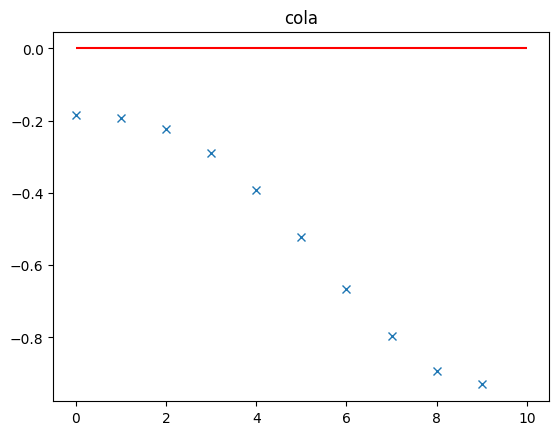

In [35]:
# check collision avoidance
import constraints

cola = constraints.C_cola(X, U, r, constraints.get_system_cola(M, N, n))

plt.figure()
plt.plot(cola, "x")
plt.hlines((0,), 0, N, "r")
plt.title("cola")

7.53162451527234e-05


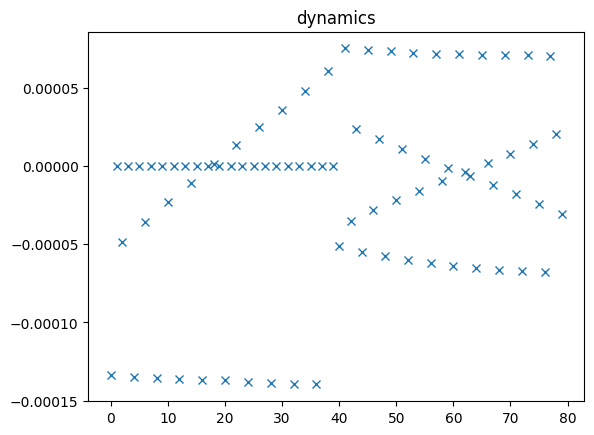

In [36]:
# check dynamics
import dynamics

A_sys, B_sys, E_sys = dynamics.get_system_dynamics(M, N, n, m, dt)

D = dynamics.D(X, U, A_sys, B_sys, E_sys, np.hstack(list_x0))

plt.figure()
plt.plot(D, "x")
plt.title("dynamics");
print(max(D))